### ** California Housing Prices Dataset

### ** DESCRIPTION**
This report analyzes trends using the 1900 califorina housing census dataset, focusing on district-specific house statistics. The chosen dataset is beginner-friendly,providing valuable insights into machine learning basics. The report aims to demonstrate linear regression relationships between the median house value and various independent variables.

1. _median income_
2. _population_
3. _number of households_

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# **LOAD THE DATA

The dataset is placed inside the data folder in github repository. 

In [38]:
# Load the dataset
housing_data = pd.read_csv("https://raw.githubusercontent.com/sudha548322/CSCN8010-labs/main/data/housing.csv")

### ** DATA ANALYSIS (EDA)**

# **3.1 EXPLORE STATISTICS

In [39]:
print(housing_data.describe())

          longitude      latitude  housing_median_age   total_rooms   
count  20640.000000  20640.000000        20640.000000  20640.000000  \
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income   
count    20433.000000  20640.000000  20640.000000   20640.000000  \
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

# **3.2  VARIABLES AND IT DESCRIPTION

The report utilizes four variables: median house value, median income, population, and households. According to the dataset description, the mean values of these columns are close to the minimum values. This suggests that a majority of the population tends to purchase houses with values ranging from the minimum to the average, while a smaller portion invests in houses closer to the maximum value. 

The minimum and maximum values for each column are as follows:

|    Column Name     |    Min   |    Max    |
| ------------------ | -------- | --------- |
| median_house_value | 14999    | 500001    |
| median_income      | 0.499900 | 15.000100 |
| population         | 3        | 35682     |
| households         | 1        | 6082      |

# **3.3 SEABORN SCATTER 

a. Plot between `median_house_value` and `median_income`

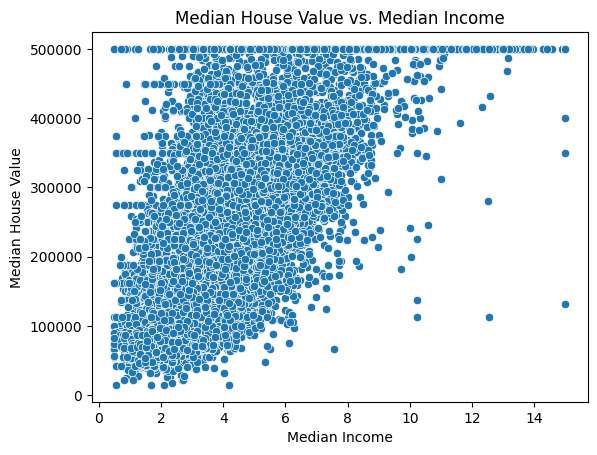

In [40]:
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data)
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

Plot (a) Insight:

The median house value exhibits a linear rise with increasing median income. Although there are some outliners,the majority of data points points align closely to gradually ascending line, ultimately reaching the maximum value of 500001

b.  `median_house_value` and   `population`

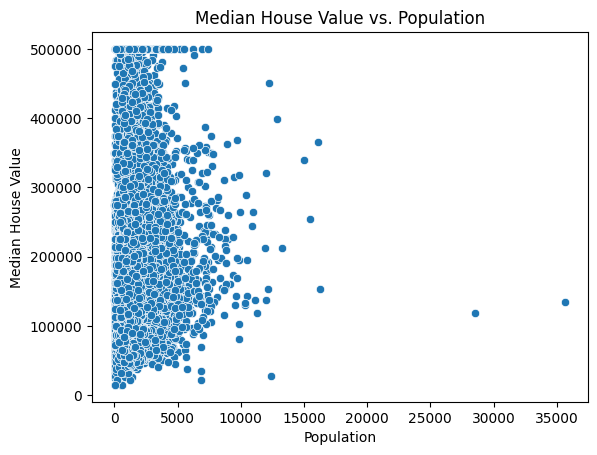

In [41]:
sns.scatterplot(x='population', y='median_house_value', data=housing_data)
plt.title('Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

Plot (b) Insight:

The graph indicates that the majority of regions exhibit house prices below 5000, with only a small number  exceeding this threshold. Additionlly, areas with house values surpassing 20000 are scarce, and for populations exceeding 20000, the house prices tend to range between 25000 and 35000. 

c. Plot between `median_house_value` and `Number of households`

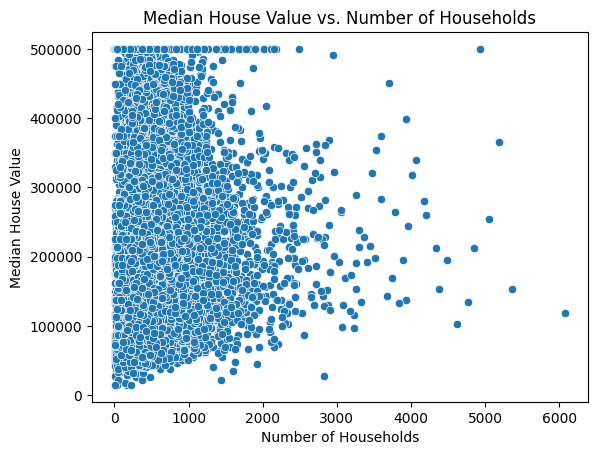

In [42]:
sns.scatterplot(x='households', y='median_house_value', data=housing_data)
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()

Plot (c) Insight:

There is no proper proportion between number of houses and the median house value. 

# **4. LINEAR REGRESSION

a. Linear regression between  `median_house_value`` vs. `median_income``

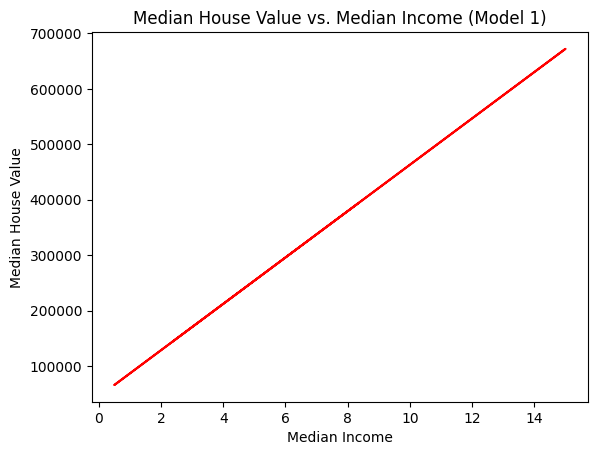

In [43]:
model1 = LinearRegression().fit(housing_data[['median_income']], housing_data[['median_house_value']])
pred1 = model1.predict(housing_data[['median_income']])
plt.plot(housing_data['median_income'], pred1, color='red')
plt.title('Median House Value vs. Median Income (Model 1)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

b. Linear regression between `median_house_value` and `population`

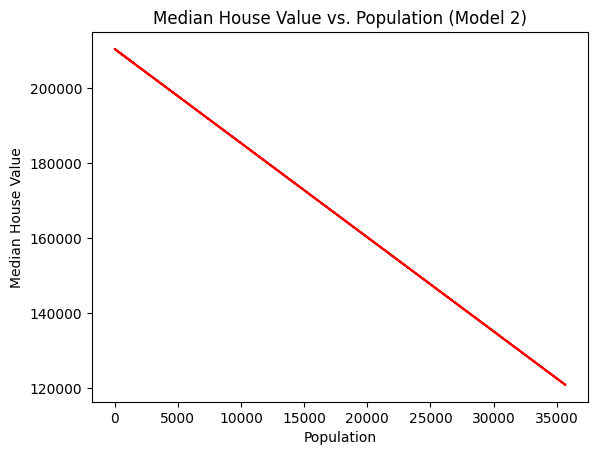

In [44]:
model2 = LinearRegression().fit(housing_data[['population']], housing_data[['median_house_value']])
pred2 = model2.predict(housing_data[['population']])
plt.plot(housing_data['population'], pred2, color='red')
plt.title('Median House Value vs. Population (Model 2)')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

c. Linear regression between `median_house_values` and `number_of_households`

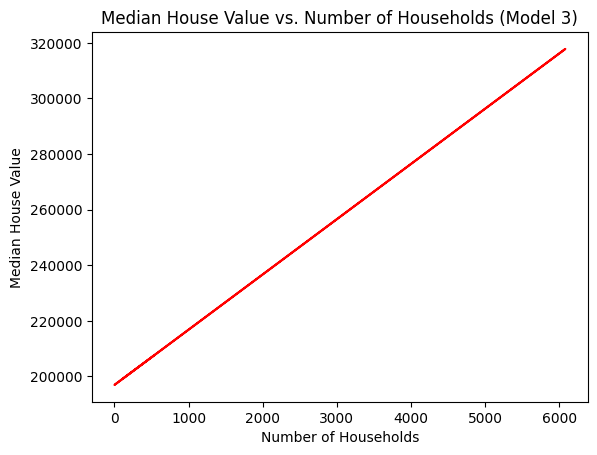

In [45]:
model3 = LinearRegression().fit(housing_data[['households']], housing_data[['median_house_value']])
pred3 = model3.predict(housing_data[['households']])
plt.plot(housing_data['households'], pred3, color='red')
plt.title('Median House Value vs. Number of Households (Model 3)')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()

# **5.SUMMARY TABLE OF PLOTS

In [46]:
# Function to return model summary
def run_summary(X, y):
    # Fit the model
    model = LinearRegression().fit(X, y)
    
    # Predict
    y_pred = model.predict(X)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    
    # Return model summary
    return {
        'intercept': model.intercept_,
        'slope': model.coef_[0],
        'MSE': mse,
        'MAE': mae,
    }

In [47]:
# Summary 1: Median Income vs. Median House Value
model1_summary = run_summary(housing_data[['median_income']], housing_data['median_house_value'])

# Summary 2: Population vs. Median House Value
model2_summary = run_summary(housing_data[['population']], housing_data['median_house_value'])

# Summary 3: Number of Households vs. Median House Value
model3_summary = run_summary(housing_data[['households']], housing_data['median_house_value'])

In [48]:
# Summary table
summary_table = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Intercept': [model1_summary['intercept'], model2_summary['intercept'], model3_summary['intercept']],
    'Slope': [model1_summary['slope'], model2_summary['slope'], model3_summary['slope']],
    'Mean Squared Error (MSE)': [model1_summary['MSE'], model2_summary['MSE'], model3_summary['MSE']],
    'Mean Absolute Error (MAE)': [model1_summary['MAE'], model2_summary['MAE'], model3_summary['MAE']]
})

print(summary_table)

     Model      Intercept         Slope  Mean Squared Error (MSE)   
0  Model 1   45085.576703  41793.849202              7.011312e+09  \
1  Model 2  210436.262076     -2.511753              1.330741e+10   
2  Model 3  196928.577162     19.872775              1.325778e+10   

   Mean Absolute Error (MAE)  
0               62625.933791  
1               91153.820095  
2               90802.743243  


# **6. LINE AND SCATTER PLOT

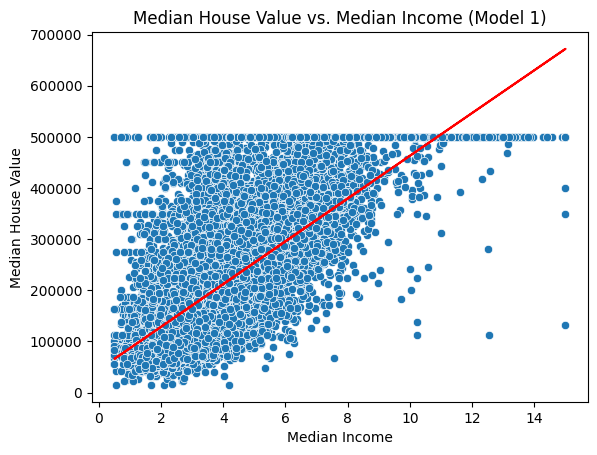

In [49]:
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data)
plt.plot(housing_data['median_income'], pred1, color='red')
plt.title('Median House Value vs. Median Income (Model 1)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

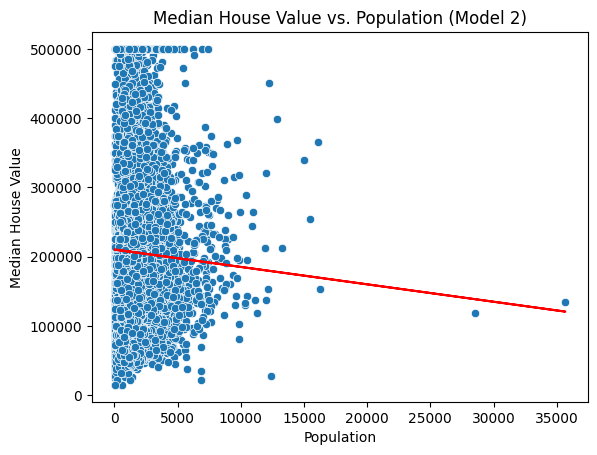

In [50]:
sns.scatterplot(x='population', y='median_house_value', data=housing_data)
plt.plot(housing_data['population'], pred2, color='red')
plt.title('Median House Value vs. Population (Model 2)')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

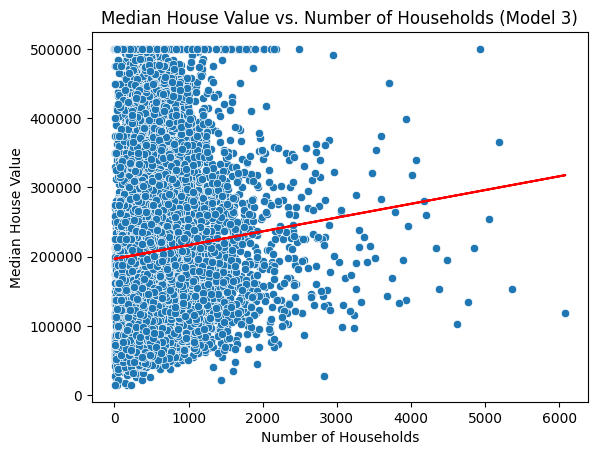

In [51]:
sns.scatterplot(x='households', y='median_house_value', data=housing_data)
plt.plot(housing_data['households'], pred3, color='red')
plt.title('Median House Value vs. Number of Households (Model 3)')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()

# **7. CONCLUSION

The median house value exhibits a linear rise with increasing median income. Although there are some outliners,the majority of data points points align closely to gradually ascending line, ultimately reaching the maximum value of 500001.
the graph indicates that the majority of regions exhibit house prices below 5000, with only a small number  exceeding this threshold. Additionlly, areas with house values surpassing 20000 are scarce, and for populations exceeding 20000, the house prices tend to range between 25000 and 35000. 